In [2]:
# imports

# make notebook span width of browser window, for convenience
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

import numpy as np
np.warnings.filterwarnings('ignore')


# import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
# for jupyter notebooks to show plots inline
%matplotlib inline 
#%matplotlib

from astropy.table import Table
from astropy.io import fits, ascii
from astropy import units as u
from astropy.coordinates import SkyCoord



import pandas as pd 
pd.set_option('display.max_columns', 500) # convenient for 

#cyberpunk -- anna
import mplcyberpunk

In [3]:
# define paths

dirr = r'''C:\Users\Anna\GOGREEN_DR1'''
specdir = dirr + '\SPECTROSCOPY'
catdir = dirr + '\CATS'
photdir = dirr + '\PHOTOMETRY'
imdir = photdir + '\IMAGES'
oneddir = specdir + '\OneD' #I dont think either of 
twoddir = specdir + '\TwoD' #these exist in my directory

print(catdir)

C:\Users\Anna\GOGREEN_DR1\CATS


In [4]:
# define cosmology
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

In [5]:
clusters = catdir + '\Clusters.fits' #Have to add '\' at the beginning for annoying windows syntax reasons

# read in fits data table with astropy.table.Table and immediately convert to pandas Dataframe
cluster_table = Table( fits.getdata( clusters ) ).to_pandas() 
cluster_table['cluster'] = cluster_table['cluster'].str.rstrip().values # remove unnecessary spaces

print(cluster_table.columns)
cluster_table

Index(['cluster', 'fullname', 'cluster_id', 'RA_Best', 'DEC_Best', 'RA_GMOS',
       'DEC_GMOS', 'PA_deg', 'Redshift', 'vdisp', 'vdisp_err', 'gogreen_m1',
       'gogreen_m2', 'gogreen_m3', 'gogreen_m4', 'gogreen_m5', 'gogreen_m6',
       'gclass_m1', 'gclass_m2', 'gclass_m3', 'gclass_m4', 'gclass_m5',
       'Kphot_cat', 'photoz_cat', 'stelmass_cat', 'IMAGE_U', 'IMAGE_B',
       'IMAGE_G', 'IMAGE_V', 'IMAGE_R', 'IMAGE_I', 'IMAGE_Z', 'IMAGE_J',
       'IMAGE_J1', 'IMAGE_Y', 'IMAGE_K', 'IMAGE_IRAC1', 'Preimage'],
      dtype='object')


,cluster,fullname,cluster_id,RA_Best,DEC_Best,RA_GMOS,DEC_GMOS,PA_deg,Redshift,vdisp,vdisp_err,gogreen_m1,gogreen_m2,gogreen_m3,gogreen_m4,gogreen_m5,gogreen_m6,gclass_m1,gclass_m2,gclass_m3,gclass_m4,gclass_m5,Kphot_cat,photoz_cat,stelmass_cat,IMAGE_U,IMAGE_B,IMAGE_G,IMAGE_V,IMAGE_R,IMAGE_I,IMAGE_Z,IMAGE_J,IMAGE_J1,IMAGE_Y,IMAGE_K,IMAGE_IRAC1,Preimage
0,COSMOS-125,COSMOS-125,14,150.620804,2.167500,150.627197,2.159200,270.0,1.40400,NaN,400.0,GS2015ALP001-02,GS2016ALP001-02,GS2019ALP001-02,,,,,,,,,UVISTA_final_v4.1_t1.fits,UVISTA_final_v4.1_zout.fits,UVISTA_final_colors_sfrs_v4.1.dat,,,,,,,,,,,,,GMICOSMOS-125_pseudo
1,COSMOS-221,COSMOS-221,14,150.561996,2.503100,150.570206,2.498600,90.0,1.19600,200.0,50.0,GS2014BLP001-05,GS2015ALP001-01,GS2016ALP001-01,GS2019ALP001-03,,,,,,,,UVISTA_final_v4.1_t1.fits,UVISTA_final_v4.1_zout.fits,UVISTA_final_colors_sfrs_v4.1.dat,,,,,,,,,,,,,GMICOSMOS-221_pseudo
2,COSMOS-28,COSMOS-28,14,149.469193,1.668500,149.459305,1.675030,78.0,1.31600,285.0,75.0,GN2015BLP004-03,GN2019ALP004-01,GN2019ALP004-02,GN2019ALP004-03,,,,,,,,UVISTA_final_v4.1_t1.fits,UVISTA_final_v4.1_zout.fits,UVISTA_final_colors_sfrs_v4.1.dat,,,,,,,,,,,,,GMICOSMOS-28_pseud
3,COSMOS-63,COSMOS-63,14,150.358994,1.935200,150.361465,1.928342,165.0,1.17220,NaN,70.0,GN2015BLP004-02,,,,,,,,,,,UVISTA_final_v4.1_t1.fits,UVISTA_final_v4.1_zout.fits,UVISTA_final_colors_sfrs_v4.1.dat,,,,,,,,,,,,,GMICOSMOS-63_pseudo
4,SPT0205,SPT-CL J0205-5829,1,31.451000,-58.480301,31.438959,-58.482900,90.0,1.32270,678.0,57.0,GS2014BLP001-06,GS2016BLP001-09,GS2016BLP001-02,GS2017BLP001-03,GS2017BLP001-04,GS2017BDD010-01,,,,,,SPTCL-0205_totalall_FOURSTARKs.cat,SPTCL-0205_totalall_Ks.zout,SPTCL-0205_totalall_Ks.fout,mos_VIMOSU_3,mos_VIMOSB_3,,mos_VIMOSV_3,mos_VIMOSR_3,mos_VIMOSI_3,mos_VIMOSz_3,mos_FOURSTARJ_3,mos_FOURSTARJ1_3,,mos_FOURSTARKs_3,mos_IRAC1_3,mfrgS20140928S0161_add
5,SPT0546,SPT-CL J0546-5345,2,86.640297,-53.761002,86.656197,-53.758000,0.0,1.06690,977.0,68.0,GS2014BLP001-09,GS2014BLP001-10,GS2015BLP001-16,GS2017BLP001-12,GS2015BLP001-15,GS2017BLP001-13,,,,,,SPTCL-0546_totalall_FOURSTARKs.cat,SPTCL-0546_totalall_Ks.zout,SPTCL-0546_totalall_Ks.fout,mos_VIMOSU_3,mos_VIMOSB_3,,mos_VIMOSV_3,mos_VIMOSR_3,mos_VIMOSI_3,mos_VIMOSz_3,mos_FOURSTARJ_3,mos_FOURSTARJ1_3,,mos_FOURSTARKs_3,mos_IRAC1_3,mfrgS20141001S0139_add
6,SPT2106,SPT-CL J2106-5844,3,316.519104,-58.741100,316.519135,-58.741100,100.0,1.13066,1055.0,83.0,GS2018ALP001-01,GS2018ALP001-02,GS2018BLP001-04,GS2019ALP001-01,GS2018BLP001-05,,,,,,,SPTCL-2106_totalall_HAWKIKs.cat,SPTCL-2106_totalall_Ks.zout,SPTCL-2106_totalall_Ks.fout,mos_VIMOSU_3,mos_VIMOSB_3,,mos_VIMOSV_3,mos_VIMOSR_3,mos_VIMOSI_3,mos_VIMOSz_3,mos_FOURSTARJ_3,mos_FOURSTARJ1_3,,mos_FOURSTARKs_3,mos_IRAC1_3,mfrgS20150411S0405_add
7,SXDF49,SXDF49XGG,13,34.499599,-5.064900,34.537060,-5.069708,73.0,1.09100,255.0,50.0,GN2015BLP004-01,GS2018BLP001-01,GS2018BLP001-02,GS2018BLP001-03,GN2018BLP004-01,GS2014BLP001-07,,,,,,SPLASH_SXDF_Mehta_v1p6.fits,SPLASH_SXDF_Mehta_v1p6.fits,SPLASH_SXDF_Mehta_v1p6.fits,,,,,,,,,,,,,GMISXDF49_pseudo
8,SXDF64,SXDF64XGG,13,34.331902,-5.206700,34.323750,-5.171400,180.0,0.91600,530.0,80.0,GS2014BLP001-08,GS2015BLP001-02,,,,,,,,,,SPLASH_SXDF_Mehta_v1p6.fits,SPLASH_SXDF_Mehta_v1p6.fits,SPLASH_SXDF_Mehta_v1p6.fits,,,,,,,,,,,,,GMISXDF64_pseudo
9,SXDF76,SXDF76XGG,13,34.746101,-5.304100,34.736118,-5.321800,350.0,1.45900,520.0,180.0,GS2014BLP001-02,GS2015BLP001-03,GN2018BLP004-02,GN2018BLP004-03,GN2018BLP004-04,,,,,,,SPLASH_SXDF_Mehta_v1p6.fits,SPLASH_SXDF_Mehta_v1p6.fits,SPLASH_SXDF_Mehta_v1p6.fits,,,,,,,,,,,,,GMISXDF76_pseudo


In [6]:
photfile = catdir+'\Photo.fits'  #Have to add '\' at the beginning for annoying windows syntax reasons

phot_table = Table( fits.getdata(photfile) ).to_pandas()
print (phot_table.columns)
phot_table.head(5)

Index(['Cluster', 'cPHOTID', 'SPECID', 'ra', 'dec', 'zspec',
       'Redshift_Quality', 'zphot', 'zphot_l68', 'zphot_u68', 'UMINV', 'VMINJ',
       'Star', 'K_flag', 'totmask', 'Mstellar', 'u_tot', 'g_tot', 'r_tot',
       'i_tot', 'z_tot', 'y_tot', 'V_tot', 'B_tot', 'J_tot', 'H_tot', 'K_tot',
       'Ks_tot', 'IRAC1_tot', 'IRAC2_tot', 'IRAC3_tot', 'IRAC4_tot',
       'IA484_tot', 'IA527_tot', 'IA624_tot', 'IA679_tot', 'IA738_tot',
       'IA767_tot', 'IB427_tot', 'IB464_tot', 'IB505_tot', 'IB574_tot',
       'IB709_tot', 'IB827_tot', 'fuv_tot', 'nuv_tot', 'mips24_tot', 'eu_tot',
       'eg_tot', 'er_tot', 'ei_tot', 'ez_tot', 'ey_tot', 'eV_tot', 'eB_tot',
       'eJ_tot', 'eH_tot', 'eK_tot', 'eKs_tot', 'eIRAC1_tot', 'eIRAC2_tot',
       'eIRAC3_tot', 'eIRAC4_tot', 'eIA484_tot', 'eIA527_tot', 'eIA624_tot',
       'eIA679_tot', 'eIA738_tot', 'eIA767_tot', 'eIB427_tot', 'eIB464_tot',
       'eIB505_tot', 'eIB574_tot', 'eIB709_tot', 'eIB827_tot', 'efuv_tot',
       'enuv_tot', 'emips24_tot

,Cluster,cPHOTID,SPECID,ra,dec,zspec,Redshift_Quality,zphot,zphot_l68,zphot_u68,UMINV,VMINJ,Star,K_flag,totmask,Mstellar,u_tot,g_tot,r_tot,i_tot,z_tot,y_tot,V_tot,B_tot,J_tot,H_tot,K_tot,Ks_tot,IRAC1_tot,IRAC2_tot,IRAC3_tot,IRAC4_tot,IA484_tot,IA527_tot,IA624_tot,IA679_tot,IA738_tot,IA767_tot,IB427_tot,IB464_tot,IB505_tot,IB574_tot,IB709_tot,IB827_tot,fuv_tot,nuv_tot,mips24_tot,eu_tot,eg_tot,er_tot,ei_tot,ez_tot,ey_tot,eV_tot,eB_tot,eJ_tot,eH_tot,eK_tot,eKs_tot,eIRAC1_tot,eIRAC2_tot,eIRAC3_tot,eIRAC4_tot,eIA484_tot,eIA527_tot,eIA624_tot,eIA679_tot,eIA738_tot,eIA767_tot,eIB427_tot,eIB464_tot,eIB505_tot,eIB574_tot,eIB709_tot,eIB827_tot,efuv_tot,enuv_tot,emips24_tot
0,SPT0205,101000254,-1,31.576448,-58.548923,NaN,NaN,0.6916,0.653,0.735,1.631,1.123,0.0,0.0,0.0,9.549926e+10,5.958668,NaN,66.154896,147.931970,165.775268,NaN,NaN,NaN,267.857604,NaN,NaN,535.962,NaN,366.660295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.344913,NaN,0.639278,0.975271,2.937707,NaN,NaN,NaN,1.564002,NaN,NaN,1.421279,NaN,1.795926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SPT0205,101000272,-1,31.449797,-58.548134,NaN,NaN,0.2460,0.225,0.268,1.058,0.518,0.0,0.0,0.0,1.949845e+09,26.485655,NaN,109.153539,137.253523,139.961813,NaN,NaN,NaN,161.805530,NaN,NaN,211.424,NaN,68.881033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.342971,NaN,0.549937,0.697769,2.105134,NaN,NaN,NaN,1.581807,NaN,NaN,1.425104,NaN,4.807510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SPT0205,101000286,-1,31.382263,-58.548920,NaN,NaN,1.1126,1.055,1.172,1.959,1.431,0.0,0.0,0.0,7.079458e+10,0.347850,NaN,2.346008,7.043954,11.977094,NaN,NaN,NaN,29.401196,NaN,NaN,79.369,NaN,89.288643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.229265,NaN,0.365637,0.466435,1.403257,NaN,NaN,NaN,1.047502,NaN,NaN,0.950657,NaN,1.308389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SPT0205,101000290,-1,31.419193,-58.548588,NaN,NaN,0.5563,0.518,0.604,1.838,1.000,0.0,0.0,0.0,5.128614e+09,0.186325,NaN,7.973411,15.262561,18.372256,NaN,NaN,NaN,25.104038,NaN,NaN,43.555,NaN,21.584750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.186325,NaN,0.387106,0.379074,1.142042,NaN,NaN,NaN,0.851311,NaN,NaN,0.774211,NaN,2.001384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SPT0205,101000293,-1,31.528271,-58.548615,NaN,NaN,0.7379,0.664,0.804,1.746,1.177,0.0,0.0,0.0,2.691535e+10,1.380357,NaN,9.289432,25.285337,35.018064,NaN,NaN,NaN,48.905029,NaN,NaN,101.442,NaN,58.054011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254565,NaN,0.405987,0.721999,2.172582,NaN,NaN,NaN,1.781956,NaN,NaN,1.235519,NaN,0.906340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
zcatfile = catdir + '\Redshift_catalogue.fits'  #Have to add '\' at the beginning for annoying windows syntax reasons

# read in fits data table with astropy.table.Table and immediately convert to pandas Dataframe
redshift_table = Table( fits.getdata( zcatfile ) ).to_pandas() 
redshift_table['Cluster'] = redshift_table['Cluster'].str.rstrip().values # remove unnecessary spaces

print (redshift_table.columns)
redshift_table.head(5)

Index(['Cluster', 'SPECID', 'RA(J2000)', 'DEC(J2000)', 'OBJClass', 'Redshift',
       'Redshift_Quality', 'EXTVER', 'Spec_Flag', 'SNR_8500_VAR',
       'SNR_8500_RMS', 'D4000', 'eD4000', 'EWOII', 'eEWOII', 'EWHdelta',
       'eEWHdelta', 'EWOII_model', 'eEWOII_model', 'F_OII', 'eF_OII',
       'SFR_OII', 'eSFR_OII', 'delta_BIC', 'member_Clean', 'member_EM',
       'member'],
      dtype='object')


,Cluster,SPECID,RA(J2000),DEC(J2000),OBJClass,Redshift,Redshift_Quality,EXTVER,Spec_Flag,SNR_8500_VAR,SNR_8500_RMS,D4000,eD4000,EWOII,eEWOII,EWHdelta,eEWHdelta,EWOII_model,eEWOII_model,F_OII,eF_OII,SFR_OII,eSFR_OII,delta_BIC,member_Clean,member_EM,member
0,COSMOS-125,114080478,150.605179,2.118631,1,1.41478,2,1,0.0,2.855579,1.827386,NaN,NaN,NaN,NaN,NaN,NaN,4.155094,1.096318,6.318261e-18,1.558597e-18,3.228765,0.796476,7.636033,-1.0,-1.0,-1.0
1,COSMOS-125,114080570,150.594482,2.120006,1,1.34553,4,2,0.0,3.217247,2.300130,1.364112,0.076498,11.551618,4.967136,5.405303,4.758426,11.549834,1.890590,1.721636e-17,2.658499e-18,4.880185,0.753583,71.387192,-1.0,-1.0,-1.0
2,COSMOS-125,114081196,150.587677,2.128183,3,0.96172,4,3,0.0,10.048548,7.505558,1.206696,0.030443,3.372206,1.760464,3.249191,1.707648,4.091792,0.768290,2.271857e-17,4.008346e-18,3.261066,0.575365,25.215458,-1.0,-1.0,-1.0
3,COSMOS-125,114081258,150.596909,2.129453,1,0.72447,3,4,0.0,4.754746,3.284939,1.433353,0.130532,1.186794,38.480305,-1.591362,6.184247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,-1.0
4,COSMOS-125,114081508,150.609695,2.134149,1,1.13177,4,5,0.0,2.862871,1.829309,1.294710,0.089390,67.153458,35.867435,2.344702,5.377402,42.830364,3.741641,5.937891e-17,4.418138e-18,5.096052,0.379176,297.244873,-1.0,-1.0,-1.0


In [8]:
# Merge photo and spec tables to return a table that has photometric information (if available) 
# for every object in the redshift catalogue

# this way avoids duplicate columns (ie dont need to specify suffixes)
merge_col = ['SPECID']
cols_to_use = phot_table.columns.difference(redshift_table.columns).tolist() + merge_col
matched_table = pd.merge(redshift_table, phot_table[cols_to_use], how='left', \
                         left_on=['SPECID'], right_on=merge_col )
merge_col = ['cluster']
#cols_to_use = cluster_table.columns.difference(matched_table.columns).tolist() 
#matched_table = pd.merge(matched_table, cluster_table[cols_to_use], how='left', \
#                         left_on=['Cluster'], right_on=merge_col )

# Here attach suffix _c to distinguish between galaxy values (Redshift) and cluster values (Redshift_c)
matched_table = pd.merge(matched_table, cluster_table, how='left', \
                         left_on=['Cluster'], right_on=merge_col, suffixes=['','_c'] )
print (matched_table.columns.values)
display(matched_table.head(20))


['Cluster' 'SPECID' 'RA(J2000)' 'DEC(J2000)' 'OBJClass' 'Redshift'
 'Redshift_Quality' 'EXTVER' 'Spec_Flag' 'SNR_8500_VAR' 'SNR_8500_RMS'
 'D4000' 'eD4000' 'EWOII' 'eEWOII' 'EWHdelta' 'eEWHdelta' 'EWOII_model'
 'eEWOII_model' 'F_OII' 'eF_OII' 'SFR_OII' 'eSFR_OII' 'delta_BIC'
 'member_Clean' 'member_EM' 'member' 'B_tot' 'H_tot' 'IA484_tot'
 'IA527_tot' 'IA624_tot' 'IA679_tot' 'IA738_tot' 'IA767_tot' 'IB427_tot'
 'IB464_tot' 'IB505_tot' 'IB574_tot' 'IB709_tot' 'IB827_tot' 'IRAC1_tot'
 'IRAC2_tot' 'IRAC3_tot' 'IRAC4_tot' 'J_tot' 'K_flag' 'K_tot' 'Ks_tot'
 'Mstellar' 'Star' 'UMINV' 'VMINJ' 'V_tot' 'cPHOTID' 'dec' 'eB_tot'
 'eH_tot' 'eIA484_tot' 'eIA527_tot' 'eIA624_tot' 'eIA679_tot' 'eIA738_tot'
 'eIA767_tot' 'eIB427_tot' 'eIB464_tot' 'eIB505_tot' 'eIB574_tot'
 'eIB709_tot' 'eIB827_tot' 'eIRAC1_tot' 'eIRAC2_tot' 'eIRAC3_tot'
 'eIRAC4_tot' 'eJ_tot' 'eK_tot' 'eKs_tot' 'eV_tot' 'efuv_tot' 'eg_tot'
 'ei_tot' 'emips24_tot' 'enuv_tot' 'er_tot' 'eu_tot' 'ey_tot' 'ez_tot'
 'fuv_tot' 'g_tot' 'i_tot

,Cluster,SPECID,RA(J2000),DEC(J2000),OBJClass,Redshift,Redshift_Quality,EXTVER,Spec_Flag,SNR_8500_VAR,SNR_8500_RMS,D4000,eD4000,EWOII,eEWOII,EWHdelta,eEWHdelta,EWOII_model,eEWOII_model,F_OII,eF_OII,SFR_OII,eSFR_OII,delta_BIC,member_Clean,member_EM,member,B_tot,H_tot,IA484_tot,IA527_tot,IA624_tot,IA679_tot,IA738_tot,IA767_tot,IB427_tot,IB464_tot,IB505_tot,IB574_tot,IB709_tot,IB827_tot,IRAC1_tot,IRAC2_tot,IRAC3_tot,IRAC4_tot,J_tot,K_flag,K_tot,Ks_tot,Mstellar,Star,UMINV,VMINJ,V_tot,cPHOTID,dec,eB_tot,eH_tot,eIA484_tot,eIA527_tot,eIA624_tot,eIA679_tot,eIA738_tot,eIA767_tot,eIB427_tot,eIB464_tot,eIB505_tot,eIB574_tot,eIB709_tot,eIB827_tot,eIRAC1_tot,eIRAC2_tot,eIRAC3_tot,eIRAC4_tot,eJ_tot,eK_tot,eKs_tot,eV_tot,efuv_tot,eg_tot,ei_tot,emips24_tot,enuv_tot,er_tot,eu_tot,ey_tot,ez_tot,fuv_tot,g_tot,i_tot,mips24_tot,nuv_tot,r_tot,ra,totmask,u_tot,y_tot,z_tot,zphot,zphot_l68,zphot_u68,zspec,cluster,fullname,cluster_id,RA_Best,DEC_Best,RA_GMOS,DEC_GMOS,PA_deg,Redshift_c,vdisp,vdisp_err,gogreen_m1,gogreen_m2,gogreen_m3,gogreen_m4,gogreen_m5,gogreen_m6,gclass_m1,gclass_m2,gclass_m3,gclass_m4,gclass_m5,Kphot_cat,photoz_cat,stelmass_cat,IMAGE_U,IMAGE_B,IMAGE_G,IMAGE_V,IMAGE_R,IMAGE_I,IMAGE_Z,IMAGE_J,IMAGE_J1,IMAGE_Y,IMAGE_K,IMAGE_IRAC1,Preimage
0,COSMOS-125,114080478,150.605179,2.118631,1,1.41478,2,1,0.0,2.855579,1.827386,NaN,NaN,NaN,NaN,NaN,NaN,4.155094,1.096318e+00,6.318261e-18,1.558597e-18,3.228765,0.796476,7.636033,-1.0,-1.0,-1.0,0.609902,18.066949,0.726191,0.721243,1.166607,1.436300,1.869293,1.890324,0.601242,0.549283,0.837532,0.817739,1.621869,2.850332,45.969028,37.904221,50.996698,33.386247,12.081746,0.0,NaN,24.427,2.511886e+10,0.0,1.41,1.19,0.632170,13080478.0,2.118631,0.054433,0.767016,0.174434,0.165775,0.194228,0.197940,0.251136,0.262270,0.194228,0.205362,0.215259,0.205362,0.222682,0.316704,3.580235,3.315491,10.300289,7.028098,0.548046,NaN,0.967,0.074227,NaN,0.079176,0.121238,9.898224,NaN,0.092784,0.097733,0.451550,0.273404,NaN,0.656912,2.113007,33.114080,NaN,1.016915,150.60518,0.0,0.455261,7.978208,4.973236,1.3423,1.280,1.404,NaN,COSMOS-125,COSMOS-125,14,150.620804,2.1675,150.627197,2.1592,270.0,1.404,NaN,400.0,GS2015ALP001-02,GS2016ALP001-02,GS2019ALP001-02,,,,,,,,,UVISTA_final_v4.1_t1.fits,UVISTA_final_v4.1_zout.fits,UVISTA_final_colors_sfrs_v4.1.dat,,,,,,,,,,,,,GMICOSMOS-125_pseudo
1,COSMOS-125,114080570,150.594482,2.120006,1,1.34553,4,2,0.0,3.217247,2.300130,1.364112,0.076498,11.551618,4.967136e+00,5.405303,4.758426,11.549834,1.890590e+00,1.721636e-17,2.658499e-18,4.880185,0.753583,71.387192,-1.0,-1.0,-1.0,0.782192,15.341884,0.733684,0.869507,1.524366,1.849369,1.953662,2.624286,0.915589,0.967736,0.614840,1.297590,2.129503,2.797702,32.765977,27.882428,14.768277,17.373159,10.016913,0.0,NaN,19.955,1.380384e+10,0.0,1.16,1.07,1.104771,13080570.0,2.120006,0.055784,0.748237,0.173416,0.174629,0.209797,0.208585,0.251029,0.284985,0.225562,0.237689,0.194032,0.231626,0.240115,0.311664,2.689771,2.706749,8.177245,9.875027,0.533589,NaN,0.917,0.078826,0.190394,0.077613,0.122483,NaN,0.258305,0.097016,0.107930,0.440211,0.269220,-0.071549,0.819786,2.680070,NaN,-0.323791,1.536493,150.59448,0.0,0.617265,7.249528,5.181873,1.2859,1.234,1.349,NaN,COSMOS-125,COSMOS-125,14,150.620804,2.1675,150.627197,2.1592,270.0,1.404,NaN,400.0,GS2015ALP001-02,GS2016ALP001-02,GS2019ALP001-02,,,,,,,,,UVISTA_final_v4.1_t1.fits,UVISTA_final_v4.1_zout.fits,UVISTA_final_colors_sfrs_v4.1.dat,,,,,,,,,,,,,GMICOSMOS-125_pseudo
2,COSMOS-125,114081196,150.587677,2.128183,3,0.96172,4,3,0.0,10.048548,7.505558,1.206696,0.030443,3.372206,1.760464e+00,3.249191,1.707648,4.091792,7.682897e-01,2.271857e-17,4.008346e-18,3.261066,0.575365,25.215458,-1.0,-1.0,-1.0,3.652005,42.009453,4.234634,5.053243,7.090814,8.726405,13.136803,16.045063,3.661770,3.577142,4.442948,6.583049,9.439229,20.836285,69.497140,46.354754,35.556601,37.348427,37.392368,3.0,NaN,53.981,1.659587e+10,0.0,1.09,0.69,5.513812,13081196.0,2.128183,0.104157,1.035060,0.428020,0.428020,0.465452,0.434530,0.621687,0.681903,0.48498

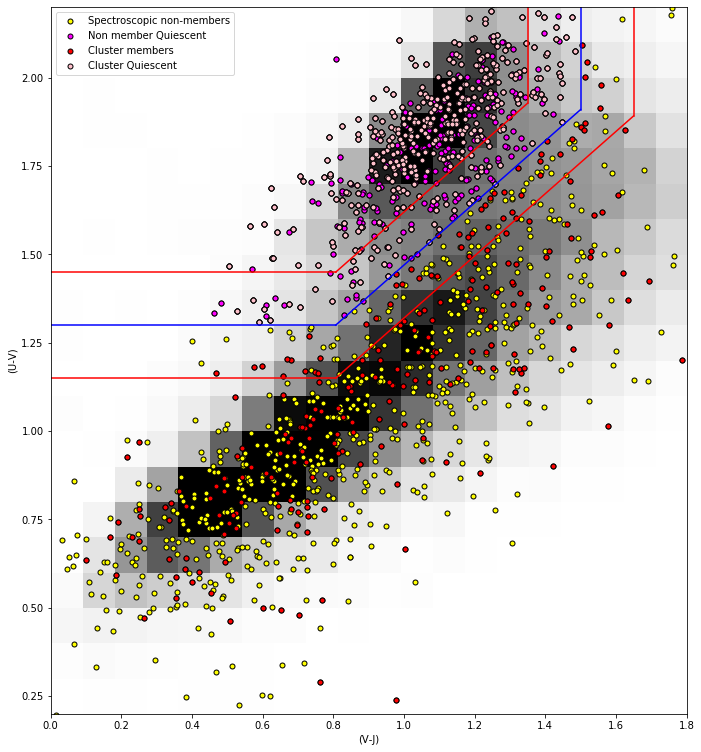

In [106]:
## bin_range = ([0,1.8],[0.2,2.2])
cmap = 'gray_r'

# use full photometric catalogue
selection = '(zphot>0.8) & (zphot<1.5) & (Mstellar>10**9.5) & (Mstellar<10**12)'
UminV,VminJ,photz,mass = phot_table.query(selection)[['UMINV','VMINJ','zphot','Mstellar']].values.T
lmass = np.log10(mass)

selection = '(Redshift_Quality>2) & (Redshift>=0.8) & (Redshift<=1.5)'
UminVspec,VminJspec,mem = matched_table.query(selection)[['UMINV','VMINJ','member']].values.T

# Show in greyscale all galaxies with stellar mass between 9.5 and 12, and photo-z between 0.8 and 1.5
Nbins = 20
N,xedges,yedges = np.histogram2d( VminJ, UminV, bins=Nbins, range=bin_range)
N = N.T
xcenters = (xedges[:-1] + xedges[1:]) / 2
ycenters = (yedges[:-1] + yedges[1:]) / 2
X, Y = np.meshgrid(xedges, yedges)

#define subset of galaxies that are quiescent for all galaxies and for cluster galaxies (where mem==1)
quiescent = np.where( (VminJspec<1.5) & (UminVspec>1.3) & (UminVspec>VminJspec*0.88+0.59))
quiescent_cluster = np.where( (VminJspec<1.5) & (UminVspec>1.3) & (UminVspec>VminJspec*0.88+0.59) & (mem==1))
#define subset of galaxies that are transitioning for all galaxies and for cluster galaxies (where mem==1)
#transition = np.where( (1.35<VminJspec<1.65) & (1.15<UminVspec<1.45)
#                      & (UminVspec>VminJspec*0.88+0.4397) & (UminVspec<VminJspec*0.88+0.7397))
#transition_cluster = np.where( (1.35<VminJspec<1.65) & (1.15<UminVspec<1.45)
#                      & (UminVspec>VminJspec*0.88+0.4397) & (UminVspec<VminJspec*0.88+0.7397) & (mem==1))

fig,ax=plt.subplots(1,1,figsize=(13,13))

field = ax.imshow(N, interpolation='nearest', origin='lower',cmap=cmap,vmin=0,vmax=800,extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])

#make line for quiescent cutoff: from (X<1.5) & (Y>1.3) & (Y>X*0.88+0.59))
# draw vert line from (1.5, 1.91) to (1.5, 2.5)
ax.plot([1.5, 1.5], [1.91, 2.5], 'b-')
#horz line from (0, 1.3) to (.807, 1.3)
ax.plot([0, .807], [1.3, 1.3], 'b-')
#diag line from (.807, 1.3) to (1.5, 1.91)
ax.plot([.807, 1.5], [1.3, 1.91], 'b-')

#make transition region:
#vert left from (1.35,1.928) to (1.35,2.5)
ax.plot([1.35, 1.35], [1.928, 2.5], 'r-')
#vert right from (1.65, 1.91) to (1.65,2.5)
ax.plot([1.65, 1.65], [1.892, 2.5], 'r-')

#horz above from () to () - same x values, shiftd y values up and down
ax.plot([0, .807], [1.45, 1.45], 'r-')
#horz below from () to ()
ax.plot([0, .807], [1.15, 1.15], 'r-')

#diag line
ax.plot([.807, 1.35], [1.45, 1.928], 'r-')
ax.plot([.807, 1.65], [1.15, 1.892], 'r-')

ax.scatter(VminJspec, UminVspec, c='yellow', edgecolor='k', alpha=1, s=25, label='Spectroscopic non-members')
ax.scatter(VminJspec[quiescent], UminVspec[quiescent], c='magenta', edgecolor='k', alpha=1, s=25, label='Non member Quiescent') #Q
ax.scatter(VminJspec[mem==1], UminVspec[mem==1], c='red', edgecolor='k', alpha=1, s=25, label='Cluster members')
ax.scatter(VminJspec[quiescent_cluster], UminVspec[quiescent_cluster], c='pink', edgecolor='k', alpha=1, s=25, label='Cluster Quiescent') #Q
#cluster trans
#ax.scatter(VminJspec[transition], UminVspec[transition], c='forestgreen', edgecolor='k', alpha=1, s=25, label='Non member Transition') #Q
#non member trans
#ax.scatter(VminJspec[transition_cluster], UminVspec[transition_cluster], c='lime', edgecolor='k', alpha=1, s=25, label='Cluster Transition') #Q
[]
ax.legend()
ax.set_ylim(0.2,2.2)
ax.set_xlim(0,1.8)
ax.set_xlabel("(V-J)")
ax.set_ylabel("(U-V)")
fig.show()

#print(VminJspec[quiescent_cluster])

In [105]:
#this doesn't work because it means 0 galaxies fit this criteria: need to split up
transition = np.where( (1.35<VminJspec) & (VminJspec<=1.65) & (1.15<UminVspec) & (UminVspec<=1.45)
                      & (UminVspec>VminJspec*0.88+0.4397) & (UminVspec<=VminJspec*0.88+0.7397))

#this wont work - use above
#transition_cluster = np.where( (1.35<VminJspec<1.65) & (1.15<UminVspec<1.45)
#                      & (UminVspec>VminJspec*0.88+0.4397) & (UminVspec<VminJspec*0.88+0.7397) & (mem==1))

#The way I see it we need 4 sections moving from left to right

#for ease
x = VminJspec
y = UminVspec

#a section for the horz strip that from x=0 to x=0.807 selects galaxies that meet the criteria 1.15<y<1.45
if (x>=0.807).any:
    transition_range_1 = np.where( (y>1.15)&(y<=1.45) )


#section for the diag. strip from x=0.807 to x=1.35 that selects galaxies that meet criteria y>x*0.88+0.4397 and y<=x*0.88+0.7397
if( (x>.807).any and (x<=1.35).any):
    transition_range_2 = np.where( (y>x*0.88+0.4397) & (y<=x*0.88+0.7397))
    
#sect. for a weird triangle from x=1.35 to x=1.65 AND y=1.91 to y=2.5 AND above the lower diag. line, y>x*0.88+0.4397
if ( (x>=1.35).any and (y<=1.91).any  ):
    transition_range_3 = np.where(y>=x*0.88+0.4397)


#sect. for vert strip from y=1.91 to y=2.5 that selects for galaxies within 1.35<x<1.65
if( (y>1.91).any and (y<=2.5).any):
    transition_range_4 = np.where( (x>1.35) & (x<=1.65) )


transition_range = []
transition_range.extend(transition_range_1[0])
transition_range.extend(transition_range_2[0])
transition_range.extend(transition_range_3[0])
transition_range.extend(transition_range_4[0])

#print(len(transition_range))
#print(len(transition_range_1[0]) + len(transition_range_2[0]) +len(transition_range_3[0]) +len(transition_range_4[0]) )




#This should be an if else kind of loop, where each part of the loops lists indices for galaxies that fit
#the criteria. 
#then at the end we add each of these indices together to get the actual transition indices
#then transition_cluster should just be transition[mem==1] 
#I HOPE!!!

1545
1545


In [160]:
#query for RA and dec
#Example: see above
selection = '(zphot>0.8) & (zphot<1.5) & (Mstellar>10**9.5) & (Mstellar<10**12)'
UminV,VminJ,photz,mass = phot_table.query(selection)[['UMINV','VMINJ','zphot','Mstellar']].values.T
lmass = np.log10(mass)

selection = '(Redshift_Quality>2) & (Redshift>=0.8) & (Redshift<=1.5)'
UminVspec,VminJspec,mem,RA, DEC,cluster = matched_table.query(selection)[['UMINV','VMINJ','member','RA(J2000)','DEC(J2000)', 'Cluster']].values.T

#print(len(RA[transition_range])) #-- good
#print(RA[transition_range]) #-- good

#print(transition_range)
#print(cluster[transition_range])
SPT0205 = np.where(cluster=='SPT0205')
SPT0205=SPT0205[0]
print(SPT0205)
print(cluster[SPT0205])
#transition_range_SPT0205 = np.where (cluster[transition_range] == 'SPT0205') #didn't work

#cross reference indices in SPT0205 with indices in transition_range
transition_range_SPT0205 = np.intersect1d(transition_range,SPT0205 )
print(transition_range_SPT0205)
print(transition_range_SPT0205[0]) #First galaxy in index is 143

#find its RA and DEC
print(RA[transition_range_SPT0205][5])
print(DEC[transition_range_SPT0205][5])

ra = RA[transition_range_SPT0205][0]
dec = DEC[transition_range_SPT0205][0]

#now should have RA and dec of all the galaxies in the transition region
#next I want to choose a subsect of transition_range for one cluster so I can circle them in the fits image in DS9
#First, select for one cluster, I'll start with SPT0205 b/c I love her
#Then, get RA and DEC again, then write a regions file!



[143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188]
['SPT0205' 'SPT0205' 'SPT0205' 'SPT0205' 'SPT0205' 'SPT0205' 'SPT0205'
 'SPT0205' 'SPT0205' 'SPT0205' 'SPT0205' 'SPT0205' 'SPT0205' 'SPT0205'
 'SPT0205' 'SPT0205' 'SPT0205' 'SPT0205' 'SPT0205' 'SPT0205' 'SPT0205'
 'SPT0205' 'SPT0205' 'SPT0205' 'SPT0205' 'SPT0205' 'SPT0205' 'SPT0205'
 'SPT0205' 'SPT0205' 'SPT0205' 'SPT0205' 'SPT0205' 'SPT0205' 'SPT0205'
 'SPT0205' 'SPT0205' 'SPT0205' 'SPT0205' 'SPT0205' 'SPT0205' 'SPT0205'
 'SPT0205' 'SPT0205' 'SPT0205' 'SPT0205']
[143 147 148 149 150 152 154 155 156 157 159 160 161 164 167 169 170 171
 172 173 174 175 176 177 179 182 183 184 185 186 187 188]
143
31.38452911376953
-58.49782943725586


In [156]:
#Testing writing a ds9 file
str1 = 'global color=green dashlist=8 3 width=1 font="helvetica 10 normal roman" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1 \n'
str2 = 'fk5 \n'
str3 = 'circle(2:05:48.1436,-58:28:49.367,4.221") # color=magenta \n'
DS9 = [str1, str2, str3]
#f = open("ds9_region_anna.txt", "x")
f = open("ds9_region_anna.txt", "w")
f.writelines(DS9)
f.close()

#Works!

#Write another for SPT0205 galaxy 143, 31.46735191345215, -58.52633285522461
str1 = 'global color=green dashlist=8 3 width=1 font="helvetica 10 normal roman" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1 \n'
str2 = 'fk5 \n'
str3 = 'circle(31:28:2.466, -58:31:34.798,4.221") # color=cyan \n'
DS9 = [str1, str2, str3]
#f = open("ds9_region_SPT0205_143.txt", "x")
f = open("ds9_region_SPT0205_143.txt", "w")
f.writelines(DS9)
f.close()